Optimization terminated successfully.
         Current function value: 2.741258
         Iterations: 108
         Function evaluations: 204
Optimization terminated successfully.
         Current function value: 0.027481
         Iterations: 61
         Function evaluations: 115
a)

 [15.49267172  1.37057811] 

b)

 [15.14021947  1.35831858]


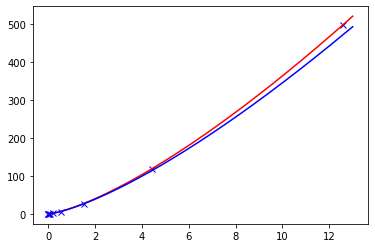

In [3]:
#PROBLEM 0

import numpy as np
from scipy.optimize import fmin
import matplotlib.pyplot as plt

x_data = [1e-3,2.85e-3,8.15e-3,2.33e-2,6.64e-2,1.89e-1,5.41e-1,1.54,4.41,12.59]
y_data = [1.27e-3,5.44e-3,2.45e-2,8.75e-2,3.60e-1,1.58,6.12,26.63,119.15,498.56]

guess = [1,1]

# a) 
def funky(A):
    return sum(np.power(A[0]*np.power(x_data,A[1])-y_data,2)) #A[0] = A, A[1] = B

# b) 
def func(A):
    return sum(np.power(((A[0]*np.power(x_data,A[1])-y_data)/y_data),2))

print('a)\n\n',fmin(funky,guess),'\n\nb)\n\n',fmin(func,guess))

# Checking curve fitting 
y1 = []
y2 = []
x = np.arange(1e-3,13,1e-3)

for value in x:
    y1.append(15.49267172*value**1.37057811)
    y2.append(15.14021947*value**1.35831858)
    
plt.plot(x_data,y_data,'bx')
plt.plot(x,y1,'r-')
plt.plot(x,y2,'b-')
#plt.xscale('log')
#plt.yscale('log')
plt.show()


Constant flow rate time is: 894.7
1702.6693632094418 filtration time in seconds


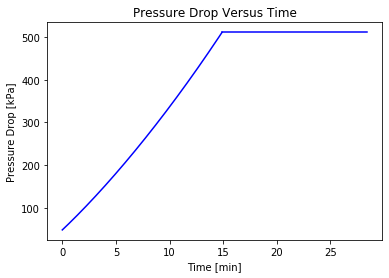

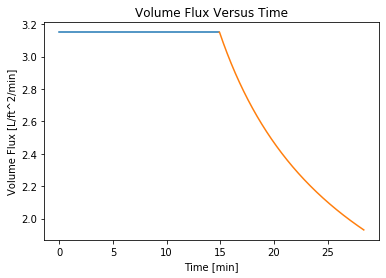

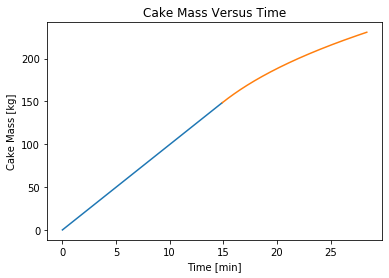

In [7]:
# PROBLEM 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Vflux = 3.15/1000/(0.3048**2)/60 # in m^3/m^2/s [m/s] -> is this Q/A
Pmax = 512e3 # [pa]
Vfiltered = 1500*0.00378541 #[m^3]
mu = 0.00101 # [pa-s]
L = 2*2.54/100 #[m]
A = 71.7*(0.3048**2) #[m^2]
kappa = 6.49e-12*(0.3048**2) #[m^2]
Cs = 1.25/(0.3048**3) # [kg/m^3]
Q = Vflux*A
alpha0 = 2.75e10
Tot_Vol = 5.678118 # [m^3]

# Constant Flow
def alpha(Pcake):
    return (alpha0*(1+3.45e-3*((Pcake/1000)**0.74)))

def const_flow(Pcake):
    return Pcake*A**2/(mu*Cs*Q**2*alpha(Pcake))-t

P_filter = mu*L*Q/kappa/A
time_Q = (Pmax-P_filter)*A**2/(mu*Cs*Q**2*alpha(Pmax - P_filter))

print("Constant flow rate time is: %.4g" %time_Q)

time = np.arange(0, time_Q, 1)
Ptot_Q = []
for t in time:
    Ptot_Q.append(fsolve(const_flow, 0)/1000+P_filter/1000) # conversion to Kpa

Pcake_final = Ptot_Q[-1] - P_filter/1000
Vol_flux_const = np.full(len(time), fill_value = Vflux)
Mcake_constQ = np.full(len(time,),fill_value = (np.multiply(1.25,np.multiply(Q*35.3147,time))))

# Constant Pressure
def Qfunc(Q, *data):
    return Q*(mu*L/kappa/A + alpha(Pmax - mu*L*Q/kappa/A)*mu*Cs*(Vnew+Vold)/A**2) - Pmax

dt = 1
dQ = [Q]
Vnew = 0
Vold = Q*time_Q
timeP = 0

while Vnew <= (Tot_Vol - Q*time_Q):
    val = Vnew
    dQ.append(fsolve(Qfunc,0,args = val))
    
    Vnew += dQ[-1]*dt
    timeP += dt
    
print(timeP + time_Q, "filtration time in seconds")
time2 = np.linspace(time_Q,timeP+time_Q,len(dQ))
ConstP = np.full((len(time2,)),fill_value = Ptot_Q[-1])
Vflux2 = np.divide(dQ,A)
time3 = np.arange(0,len(time2))
Mcake_constP = np.full(len(time2,),fill_value = Mcake_constQ[-1] + (np.multiply(1.25,np.multiply(np.multiply(dQ,35.3147),time3))))

plt.plot(time/60, Ptot_Q, 'b-')
plt.plot(time2/60,ConstP,'b-')
plt.ylabel('Pressure Drop [kPa]')
plt.xlabel('Time [min]')
plt.title('Pressure Drop Versus Time')
plt.show()

plt.plot(time/60,Vol_flux_const/0.001*60*(0.3048**2))
plt.plot(time2/60,Vflux2/0.001*60*(0.3048**2))
plt.ylabel('Volume Flux [L/ft^2/min]')
plt.xlabel('Time [min]')
plt.title('Volume Flux Versus Time')
plt.show()

plt.plot(time/60,Mcake_constQ)
plt.plot(time2/60,Mcake_constP)
plt.ylabel('Cake Mass [kg]')
plt.xlabel('Time [min]')
plt.title('Cake Mass Versus Time')
plt.show()

Radial Component of Terminal Velocity is 2.256 m/s


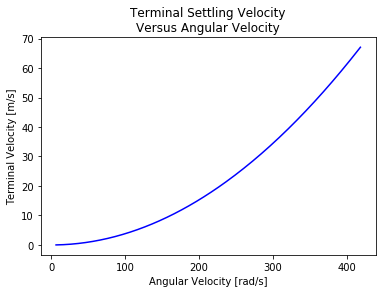

In [9]:
# PROBLEM 2
import numpy as np
import matplotlib.pyplot as plt

dp = 175e-6 # [m]
rho_p = 2800 # [kg/m^3]
rho_f = 998 # [kg/m^3]
mu = 0.001 # [Pa-s]
di = 0.35 # [m]
g = 9.81 # [m/s^2]
r = 0.35/2 # [m]
min_rpm = 60*2*np.pi/60 # [rad/s]
max_rpm = 4000*2*np.pi/60 # [rad/s]

Ap = np.pi*(dp/2)**2
mp = 4/3*np.pi*(dp/2)**3*rho_p
F_g = mp*g
F_cent = 75*F_g

# a) 

w = np.sqrt(F_cent/mp/r) # units of 1/s
up = mp*w**2*dp*r*(1-rho_f/rho_p)/12/Ap/mu # note this is independant of r

print("Radial Component of Terminal Velocity is %.4g m/s" %up)

# b) 

omega = np.arange(min_rpm,max_rpm,2)
term_v = []

for spd in omega:
    r_position = r - 5e-2 # [m] is r supposed to be -/+...
    term_v.append(mp*spd**2*dp*r_position*(1-rho_f/rho_p)/12/Ap/mu)
    
plt.plot(omega,term_v,'b-')
plt.xlabel("Angular Velocity [rad/s]")
plt.ylabel("Terminal Velocity [m/s]")
plt.title('Terminal Settling Velocity\nVersus Angular Velocity')
plt.show()

seperation capacity is 654.1 m^3/h


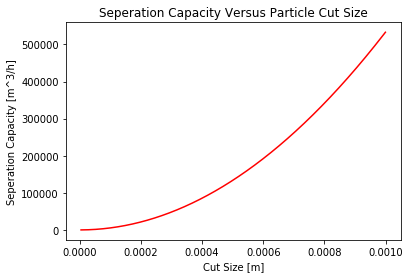

In [6]:
# PROBLEM 3 a) b) 
import numpy as np
import matplotlib.pyplot as plt

rho_f = 1205 # [kg/m^3]
rho_p = 1810 # [kg/m^3]
mu = 0.00295 # [Pa-s]
ro = 0.655/2 # [m]
depth = 0.425 # [m] # length of unit
t_liq = 0.0350 # [m]
w = 1500*2*np.pi/60 # [rotations per second]
ri = ro - t_liq
Dc = 35e-6 # [m]

V_particles = 4/3*np.pi*(Dc/2)**3
mp = V_particles*rho_p
A_p = np.pi*(Dc/2)**2 # projected area of particles

Qc_seconds = (np.pi*(ro**2-ri**2)*depth*mp*w**2*Dc*(1-rho_f/rho_p))/(12*A_p*mu*np.log(2*ro/(ri+ro)))
Qc_hr =  Qc_seconds*3600

print("seperation capacity is %.4g m^3/h" %Qc_hr)

# -----------------------------------------------------------------------

d = np.arange(5e-6,1e-3,1e-6) # diameters from 5e-6 to 1e-3 in steps of 1e-6
Q = []

for size in d:
    Ap = (np.pi*(size/2)**2)
    V_p = 4/3*np.pi*(size/2)**3
    Mp = V_p*rho_p
    Q.append((np.pi*(ro**2-ri**2)*depth*Mp*w**2*size*(1-rho_f/rho_p))/(12*Ap*mu*np.log(2*ro/(ri+ro)))*3600)

plt.plot(d,Q,'r-')
plt.xlabel("Cut Size [m]")
plt.ylabel("Seperation Capacity [m^3/h]")
plt.title("Seperation Capacity Versus Particle Cut Size")
plt.show()

# second plotting method...
# Dlist = np.linspace(5e-6,1e-3,50)
# Qlist = ((np.pi*(ro**2-ri**2)*depth*(( 4/3*np.pi*(Dlist/2)**3)*rho_p)*w**2*Dlist*(1-rho_f/rho_p))/(12*((np.pi*(Dlist/2)**2))*mu*np.log(2*ro/(ri+ro)))*3600)

# plt.plot(Dlist,Qlist,'r-')
# plt.show()

Optimization terminated successfully.
         Current function value: 132193.744296
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 9095.369511
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 7664.781500
         Iterations: 95
         Function evaluations: 179
Optimization terminated successfully.
         Current function value: 1336.791937
         Iterations: 81
         Function evaluations: 155
Optimization terminated successfully.
         Current function value: 1672.625487
         Iterations: 80
         Function evaluations: 151
Optimization terminated successfully.
         Current function value: 426.368088
         Iterations: 91
         Function evaluations: 177


C:\Users\allan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in power


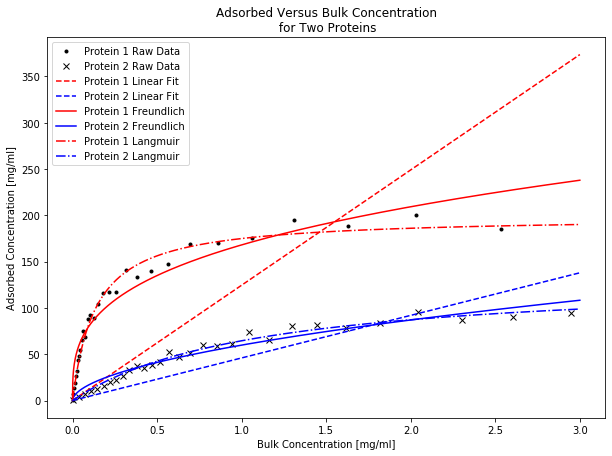

[124.51044922] [45.96826172] [167.9954933    3.16189018] [59.80677046  1.85223982] [198.57952918   7.36802994] [134.46155387   0.92178773]


In [11]:
# PROBLEM 5
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

BC_p1 = [] # bulk concentration of protien 1 [mg/ml]
AC_p1 = [] # adsorbed concentration of protien 1 [mg/ml]
BC_p2 = [] # bulk concentration of protien 2 [mg/ml]
AC_p2 = [] # adsorbed concentration of protien 2 [mg/ml]
guess_linear = [1]
guess = [1,1]

with open('HW5-5 Data.csv','r',encoding = 'utf-8-sig') as file: #make sure to have file for reading in same folder as this code (else have to call file location)
    file.readline() #skip first line
    data = csv.reader(file, delimiter = ',')
    for row in data:
        try:
            BC_p1.append(float(row[0]))
            AC_p1.append(float(row[1]))
            BC_p2.append(float(row[2]))
            AC_p2.append(float(row[3]))
        except:
            print('error')

def linear_iso1(A):
    return sum(np.power(A*BC_p1-AC_p1,2))

def linear_iso2(A):
    return sum(np.power(A*BC_p2-AC_p2,2))

def freundlich1(A):
    return sum(np.power(A[0]*np.power(BC_p1,(1/A[1])) - AC_p1,2)) # where A[0] is Kf freundlich adsorption constant and A[1] is n

def freundlich2(A):
    return sum(np.power(A[0]*np.power(BC_p2,(1/A[1])) - AC_p2,2)) # where A[0] is Kf freundlich adsorption constant and A[1] is n

def langmuir1(A):
    return sum(np.power(np.multiply(A[0],BC_p1)/(1/A[1]+BC_p1) - AC_p1,2))

def langmuir2(A):
    return sum(np.power(np.multiply(A[0],BC_p2)/(1/A[1]+BC_p2) - AC_p2,2))

# plotting
x = np.arange(0,3,1e-3)

# values of constants
CL1 = fmin(linear_iso1,guess_linear) #linear isotherm constant protein 1
CL2 = fmin(linear_iso2,guess_linear) #linear isotherm constant protien 2
CF1 = fmin(freundlich1,guess) # freundlich isotherm constants [proportional, exponent]
CF2 = fmin(freundlich2,guess) # freundlich isotherm constants [proportional, exponent]
Clang1 = fmin(langmuir1,guess) # langmuir isotherm constants [saturation concentration, Keq]
Clang2 = fmin(langmuir2,guess)

# original data
plt.figure(figsize=(10,7))
plt.plot(BC_p1,AC_p1,'k.', label = 'Protein 1 Raw Data')
plt.plot(BC_p2,AC_p2,'kx', label = 'Protein 2 Raw Data')

#linear
plt.plot(x,CL1*x, 'r--', label = 'Protein 1 Linear Fit')
plt.plot(x,CL2*x, 'b--', label = 'Protein 2 Linear Fit')

# freundlich
plt.plot(x,CF1[0]*x**(1/CF1[1]),'r-', label = 'Protein 1 Freundlich')
plt.plot(x,CF2[0]*x**(1/CF2[1]),'b-', label = 'Protein 2 Freundlich')

# langmuir
plt.plot(x,np.multiply(Clang1[0],x)/(1/Clang1[1]+x),'r-.', label = "Protein 1 Langmuir")
plt.plot(x,np.multiply(Clang2[0],x)/(1/Clang2[1]+x),'b-.', label = "Protein 2 Langmuir")


plt.xlabel("Bulk Concentration [mg/ml]")
plt.ylabel("Adsorbed Concentration [mg/ml]")
plt.title("Adsorbed Versus Bulk Concentration\n for Two Proteins")
plt.legend()
plt.show()

print(CL1, CL2, CF1, CF2, Clang1, Clang2)